# Chamfer matching
reference: https://richarddzh.gitbooks.io/book1/content/chamfer_matching.html

In [1]:
using Images, ImageDraw
using Colors
using FileIO
using Interpolations
using Plots

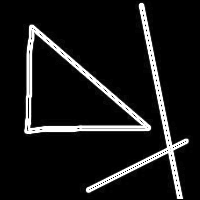

In [83]:
include("imageops.jl")
img = load("./images/input/geom.jpg")
img = Gray{Float32}.(img)
img = sobel(img)

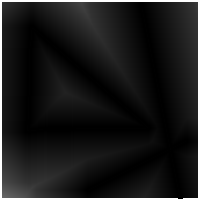

In [84]:
# distance tranform
e = distance_transform(img, m_iterations=50)
Gray.(e)

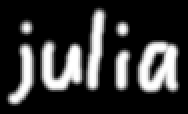

In [85]:
needle = load("./images/input/needle.png")
needle = Gray{Float32}.(needle)

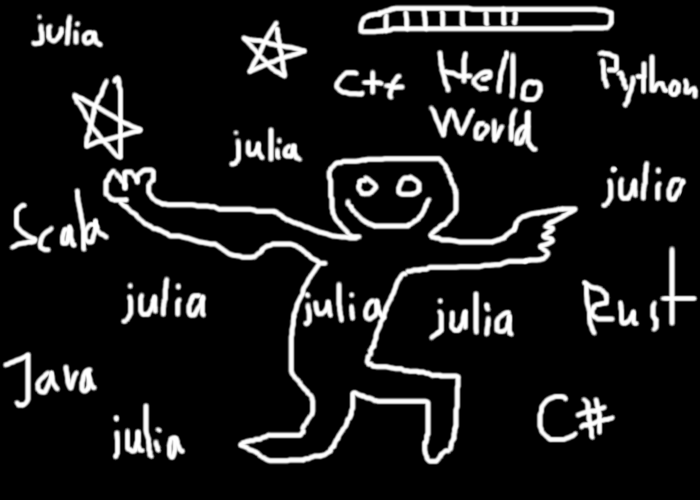

In [86]:
haystack = load("./images/input/haystack.png")
haystack = Gray{Float32}.(haystack)

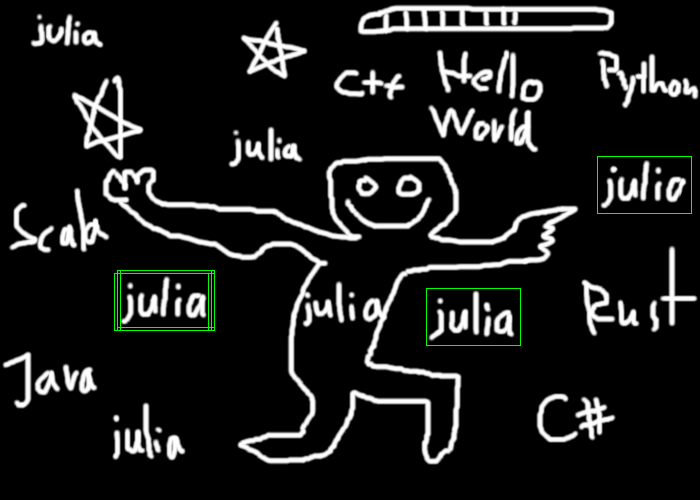

In [95]:
function visualize_chamfer_results(haystack::Matrix{Gray{Float32}}, needle_size::Tuple{Int,Int}, results::Vector{Tuple{Int,Int,Float32}})
    haystack2 = RGB{Float32}.(copy(haystack))
    nh,nw = needle_size
    for (x,y,s) in results
        draw!(haystack2, Polygon(RectanglePoints(Point(x, y), Point(x+nw, y+nh))), RGB{Float32}(0.0, 1.0, 0.0))
    end
    haystack2
end

results = chamfer_matching(haystack, needle, step_size=(3,3), threshold=-0.23)
visualize_chamfer_results(haystack, size(needle), results[1:7])

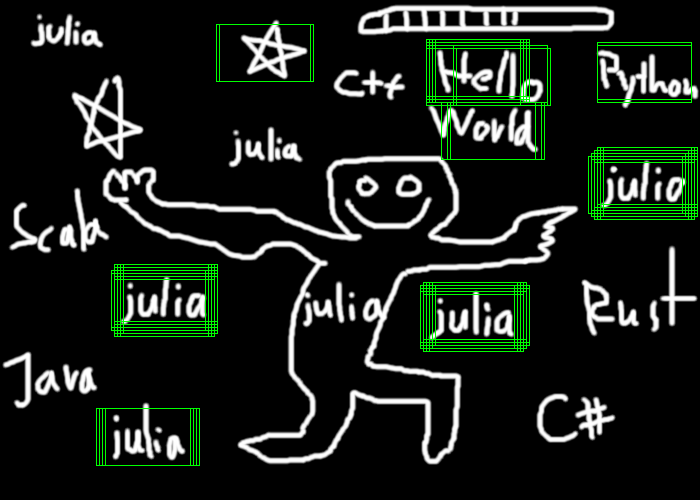

In [96]:
visualize_chamfer_results(haystack, size(needle), results)

# detecting 5 different shapes

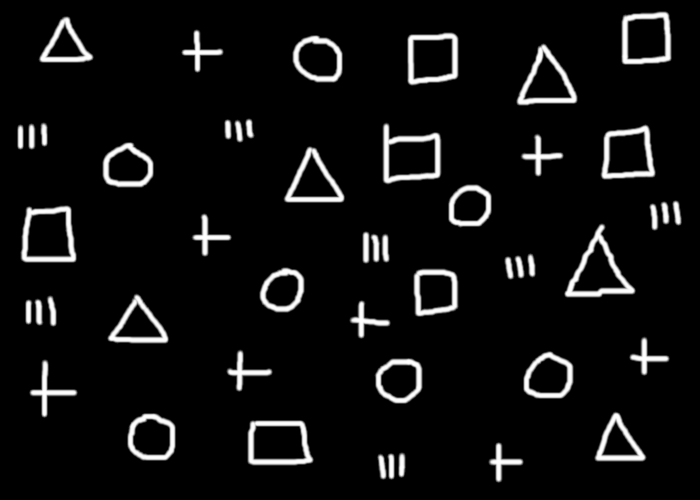

In [97]:
haystack = Gray{Float32}.(load("./images/input/shapes.png"))

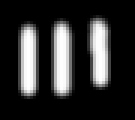

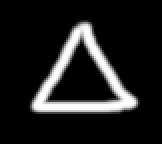

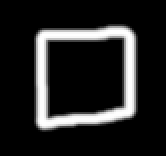

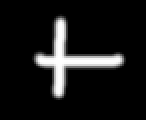

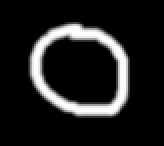

In [98]:
using IJulia
shape1 = Gray{Float32}.(load("./images/input/shape1.png"))
shape2 = Gray{Float32}.(load("./images/input/shape2.png"))
shape3 = Gray{Float32}.(load("./images/input/shape3.png"))
shape4 = Gray{Float32}.(load("./images/input/shape4.png"))
shape5 = Gray{Float32}.(load("./images/input/shape5.png"))
shapes = [shape1, shape2, shape3, shape4, shape5]
for s in shapes
    IJulia.display(s)
end

## 3 Strokes

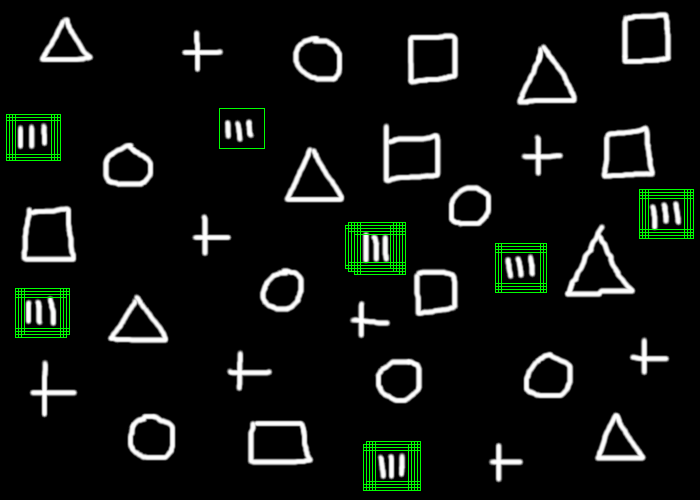

In [99]:
results = chamfer_matching(haystack, shape1, step_size=(3,3), threshold=-0.2)
visualize_chamfer_results(haystack, size(shape1), results[1:100])

## Triangle

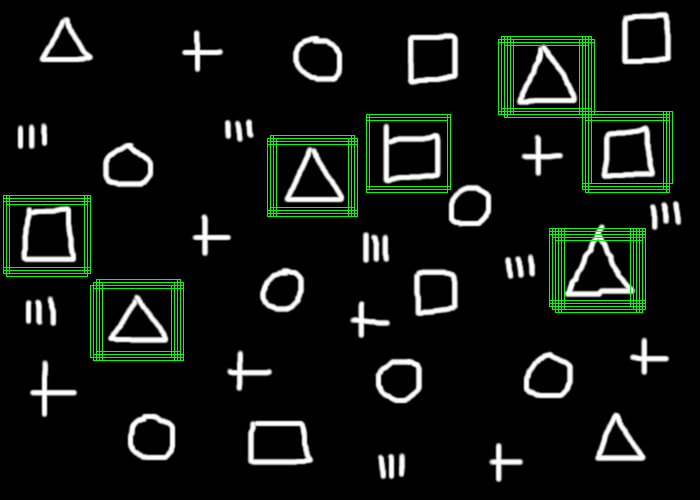

In [100]:
results = chamfer_matching(haystack, shape2, step_size=(3,3), threshold=0.0)
visualize_chamfer_results(haystack, size(shape2), results[1:100])

## Square

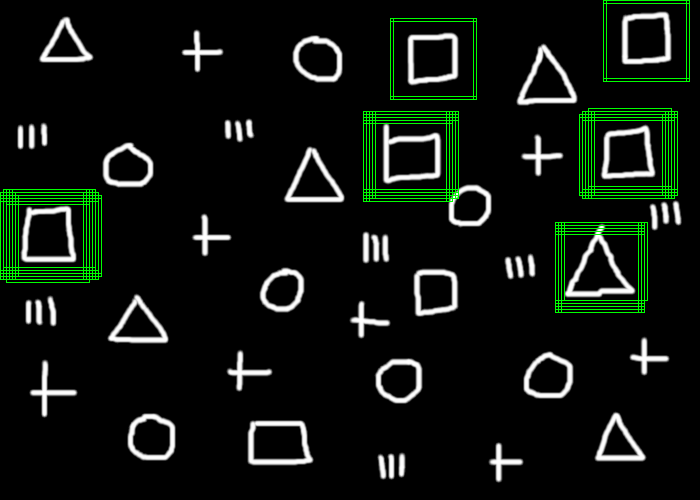

In [101]:
results = chamfer_matching(haystack, shape3, step_size=(3,3), threshold=0.0)
visualize_chamfer_results(haystack, size(shape3), results[1:100])

## Cross

(does not work well)

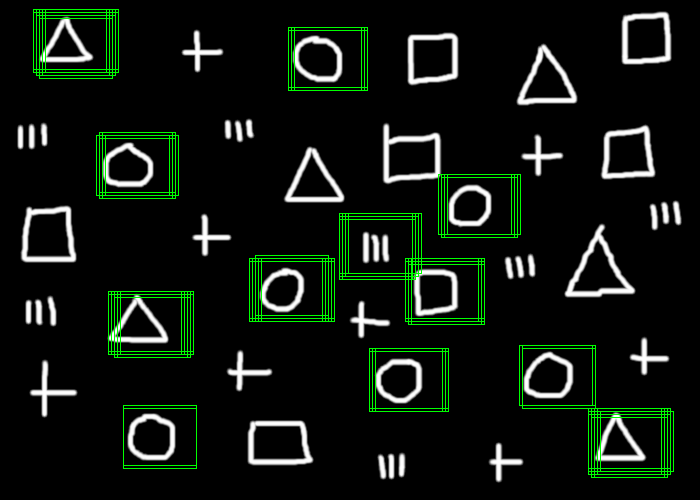

In [102]:
results = chamfer_matching(haystack, shape4, step_size=(3,3), threshold=0.0)
visualize_chamfer_results(haystack, size(shape4), results[1:100])

## Circle

(does not work well)

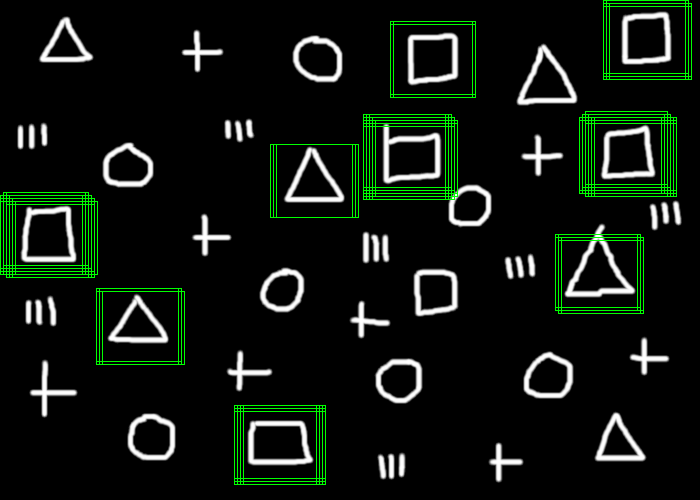

In [103]:
results = chamfer_matching(haystack, shape5, step_size=(3,3), threshold=0.0)
visualize_chamfer_results(haystack, size(shape5), results[1:100])